In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Custom functions

# Read data

In [2]:
# read data from csv
data_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv',
                     keep_default_na= False)
print(data_df.shape)
data_df = data_df.drop(columns = ['Id'])

display(data_df.head())
data_df.isnull().sum().to_csv("count_na.csv")
data_df.dtypes.to_csv("data_types.csv")
display(data_df.describe())

(1460, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Preprocess data

In [3]:
data_processed = data_df.copy()

# identify correct data type for each column
column_types_dict = {
        'Id': 'id',
        'MSSubClass': 'category',
        'MSZoning': 'category',
        'LotFrontage': 'numeric',
        'LotArea': 'numeric',
        'Street': 'category',
        'Alley': 'category',
        'LotShape': 'ordinal',
        'LandContour': 'category',
        'Utilities': 'ordinal',
        'LotConfig': 'category',
        'LandSlope': 'ordinal',
        'Neighborhood': 'category',
        'Condition1': 'category',
        'Condition2': 'category',
        'BldgType': 'category',
        'HouseStyle': 'category',
        'OverallQual': 'numeric',
        'OverallCond': 'numeric',
        'YearBuilt': 'numeric',
        'YearRemodAdd': 'numeric',
        'RoofStyle': 'category',
        'RoofMatl': 'category',
        'Exterior1st': 'category',
        'Exterior2nd': 'category',
        'MasVnrType': 'category',
        'MasVnrArea': 'numeric',
        'ExterQual': 'ordinal',
        'ExterCond': 'ordinal',
        'Foundation': 'category',
        'BsmtQual': 'ordinal',
        'BsmtCond': 'ordinal',
        'BsmtExposure': 'ordinal',
        'BsmtFinType1': 'ordinal',
        'BsmtFinSF1': 'numeric',
        'BsmtFinType2': 'ordinal',
        'BsmtFinSF2': 'numeric',
        'BsmtUnfSF': 'numeric',
        'TotalBsmtSF': 'numeric',
        'Heating': 'category',
        'HeatingQC': 'ordinal',
        'CentralAir': 'category',
        'Electrical': 'category',
        '1stFlrSF': 'numeric',
        '2ndFlrSF': 'numeric',
        'LowQualFinSF': 'numeric',
        'GrLivArea': 'numeric',
        'BsmtFullBath': 'numeric',
        'BsmtHalfBath': 'numeric',
        'FullBath': 'numeric',
        'HalfBath': 'numeric',
        'BedroomAbvGr': 'numeric',
        'KitchenAbvGr': 'numeric',
        'KitchenQual': 'ordinal',
        'TotRmsAbvGrd': 'numeric',
        'Functional': 'ordinal',
        'Fireplaces': 'numeric',
        'FireplaceQu': 'ordinal',
        'GarageType': 'category',
        'GarageYrBlt': 'numeric',
        'GarageFinish': 'ordinal',
        'GarageCars': 'numeric',
        'GarageArea': 'numeric',
        'GarageQual': 'ordinal',
        'GarageCond': 'ordinal',
        'PavedDrive': 'ordinal',
        'WoodDeckSF': 'numeric',
        'OpenPorchSF': 'numeric',
        'EnclosedPorch': 'numeric',
        '3SsnPorch': 'numeric',
        'ScreenPorch': 'numeric',
        'PoolArea': 'numeric',
        'PoolQC': 'ordinal',
        'Fence': 'ordinal',
        'MiscFeature': 'category',
        'MiscVal': 'numeric',
        'MoSold': 'numeric',
        'YrSold': 'numeric',
        'SaleType': 'category',
        'SaleCondition': 'category',
        'SalePrice': 'numeric',
}

## binary columns for categories

In [4]:
# create binary columns from category columns
def create_binary_columns(
    column_types_dict,
    df,
    encoder = None,
):
    category_col = [col for col, col_type in column_types_dict.items() if column_types_dict[col] == 'category']

    if encoder == None:
        one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output = False)
        one_hot_enc.fit(df[category_col])
    else:
        one_hot_enc = encoder
        
    binary_df = one_hot_enc.transform(df[category_col])
    binary_columns = one_hot_enc.get_feature_names_out(category_col)
    binary_df = pd.DataFrame(binary_df, columns = binary_columns)
    
    # merge original data with binary columns
    df = df.drop(columns = category_col)
    df = pd.concat([df, binary_df], axis = 1)

    return one_hot_enc, df

one_hot_encoder, data_processed = create_binary_columns(column_types_dict, data_processed)

## numeric columns

In [5]:
# process numeric columns
def process_numeric_columns(
    column_types_dict,
    df,
    imputers = {}
):
    num_col = [col for col, col_type in column_types_dict.items() if column_types_dict[col] == 'numeric']
    
    for col in num_col:
        if (col in df.columns):
            if (df[col].dtype != float) and (df[col].dtype != int):
                df[col] = pd.to_numeric(df[col], errors = 'coerce')
    
                # fill in missing values
                if col == 'MasVnrArea':
                    if col in imputers.keys():
                        imputer = imputers[col]
                    else:
                        imputer = SimpleImputer(
                            missing_values=np.nan,
                            strategy='constant',
                            fill_value = 0.0
                        )
                        imputer.fit(np.array(df[col]).reshape(-1,1))
                        imputers[col] = imputer
                    df[col] = imputer.transform(np.array(df[col]).reshape(-1,1))
                else:
                    if col in imputers.keys():
                        imputer = imputers[col]
                    else:
                        imputer = SimpleImputer(
                            missing_values=np.nan,
                            strategy='mean',
                        )
                        imputer.fit(np.array(df[col]).reshape(-1,1))
                        imputers[col] = imputer
                    df[col] = imputer.transform(np.array(df[col]).reshape(-1,1))
            
    return imputers,df
    
num_imputers, data_processed = process_numeric_columns(column_types_dict, data_processed)

## ordinal columns

In [6]:
# process ordinal columns
def process_ordinal_columns(
    column_types_dict,
    df,
    ordinal_encoders = {},
):
    ordinal_col = [col for col, col_type in column_types_dict.items() if column_types_dict[col] == 'ordinal']

    ordinal_translation = {
        "LotShape": ['Reg', 'IR1', 'IR2', 'IR3'],
        'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
        'LandSlope': ['Gtl', 'Mod', 'Sev'],
        'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
        'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
        'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
        'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
        'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
        'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
        'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
        'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
        'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
        'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
        'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
        'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
        'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
        'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
        'PavedDrive': ['Y', 'P', 'N'],
        'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'NA'],
        'Fence': ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'],
    }

    for col in ordinal_col:
        if (col in df.columns):
            if col in ordinal_encoders.keys():
                encoder = ordinal_encoders[col]
            else:
                encoder = OrdinalEncoder(
                    categories = [ordinal_translation[col]],
                    handle_unknown = "use_encoded_value",
                    unknown_value = np.nan
                ).fit(
                    np.array(df[col]).reshape(-1,1),
                )
                ordinal_encoders[col] = encoder
            df[col] = encoder.transform(np.array(df[col]).reshape(-1,1))
    
            na_imputer = SimpleImputer(strategy = 'most_frequent')
            df[col] = na_imputer.fit_transform(np.array(df[col]).reshape(-1,1))
            
    return ordinal_encoders, df
    
ordinal_encoders, data_processed = process_ordinal_columns(column_types_dict, data_processed)

# Other feature engineering

In [7]:
# feature Engineering
def feature_engineering(column_types_dict, df):
    # House Age
    df["HouseAge"] = df["YrSold"] - df['YearBuilt']
    column_types_dict["HouseAge"] = 'numeric'

    # total basement finished square feet
    df["BsmtFinSF"] = df['BsmtFinSF1'] +df['BsmtFinSF2']
    column_types_dict["BsmtFinSF"] = 'numeric'

    # total floor square feet
    df["FlrSF"] = df['1stFlrSF'] +df['2ndFlrSF']
    column_types_dict["FlrSF"] = 'numeric'

    #total bath rooms
    df["Bath"] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5 + df['FullBath'] + df['HalfBath']*0.5
    column_types_dict["Bath"] = 'numeric'

    # Garage Age
    df["GarageAge"] = df["YrSold"] - df['GarageYrBlt']
    column_types_dict["GarageAge"] = 'numeric'
    
    if 'SalePrice' in df.columns:
        df_copy = df[[col for col in df.columns if col != 'SalePrice']]
        df_copy['SalePrice'] = df['SalePrice']
        return column_types_dict, df_copy
    else:
        return column_types_dict, df

column_types_dict, data_processed = feature_engineering(column_types_dict, data_processed)

# Scaling

In [8]:
def scaling(
    column_types_dict,
    df,
    scalers = {}
):
    num_col = [
        col for col in column_types_dict.keys()\
        if column_types_dict.get(col) in ['numeric']
    ]
    
    for col in num_col:
        if (col in df.columns) and (col != 'SalePrice'):
            if col in scalers.keys():
                scaler = scalers[col]
            else:
                scaler = StandardScaler().fit(
                    np.array(df[col]).reshape(-1,1),
                )
                scalers[col] = scaler
            df[col] = scaler.transform(np.array(df[col]).reshape(-1,1))
    return scalers, df

#num_scalers, data_processed = scaling(column_types_dict, data_processed)

In [9]:
display(data_processed.head())
display(data_processed.describe())
data_processed.isnull().sum().to_csv('processed_data_count_na.csv')
data_processed.to_csv('processed_data.csv')
data_processed.dtypes.to_csv("processed_data_types.csv")

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge,BsmtFinSF,FlrSF,Bath,GarageAge,SalePrice
0,65.0,8450,0.0,0.0,0.0,7,5,2003,2003,196.0,...,0.0,0.0,1.0,0.0,5,706,1710,3.5,5.0,208500
1,80.0,9600,0.0,0.0,0.0,6,8,1976,1976,0.0,...,0.0,0.0,1.0,0.0,31,978,1262,2.5,31.0,181500
2,68.0,11250,1.0,0.0,0.0,7,5,2001,2002,162.0,...,0.0,0.0,1.0,0.0,7,486,1786,3.5,7.0,223500
3,60.0,9550,1.0,0.0,0.0,7,5,1915,1970,0.0,...,0.0,0.0,0.0,0.0,91,216,1717,2.0,8.0,140000
4,84.0,14260,1.0,0.0,0.0,8,5,2000,2000,350.0,...,0.0,0.0,1.0,0.0,8,655,2198,3.5,8.0,250000


,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,HouseAge,BsmtFinSF,FlrSF,Bath,GarageAge,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,0.408219,0.001370,0.062329,6.099315,5.575342,1971.267808,1984.865753,103.117123,...,0.008219,0.013699,0.820548,0.085616,36.547945,490.189041,1509.619178,2.210616,29.309590,180921.195890
std,22.024023,9981.264932,0.582296,0.052342,0.276232,1.382997,1.112799,30.202904,20.645407,180.731373,...,0.090317,0.116277,0.383862,0.279893,30.250152,476.103307,521.163523,0.785399,24.032619,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,1.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,1123.750000,2.000000,7.000000,129975.000000
50%,70.049958,9478.500000,0.000000,0.000000,0.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,35.000000,465.000000,1458.000000,2.000000,29.000000,163000.000000
75%,79.000000,11601.500000,1.000000,0.000000,0.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,...,0.000000,0.000000,1.000000,0.000000,54.000000,790.250000,1775.250000,2.500000,46.000000,214000.000000
max,313.000000,215245.000000,3.000000,2.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1.000000,1.000000,1.000000,1.000000,136.000000,5644.000000,5642.000000,6.000000,107.000000,755000.000000


# Exploratory Analysis

## correlations

In [ ]:
num_ordinal_col = [
    col for col in data_processed.columns\
    if column_types_dict.get(col) in ['numeric', 'ordinal']
]

num_df = data_processed[num_ordinal_col]

plt.figure(figsize=(10,8))
sns.heatmap(
    num_df.corr(),
    cmap = sns.diverging_palette(240, 10, n = 20),
    center = 0
)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


## distribution of numeric values

In [ ]:
num_ordinal_df = data_processed[num_ordinal_col]
num_ordinal_df.hist(figsize=(20,20))
plt.show()

## distribution of sales prices by category

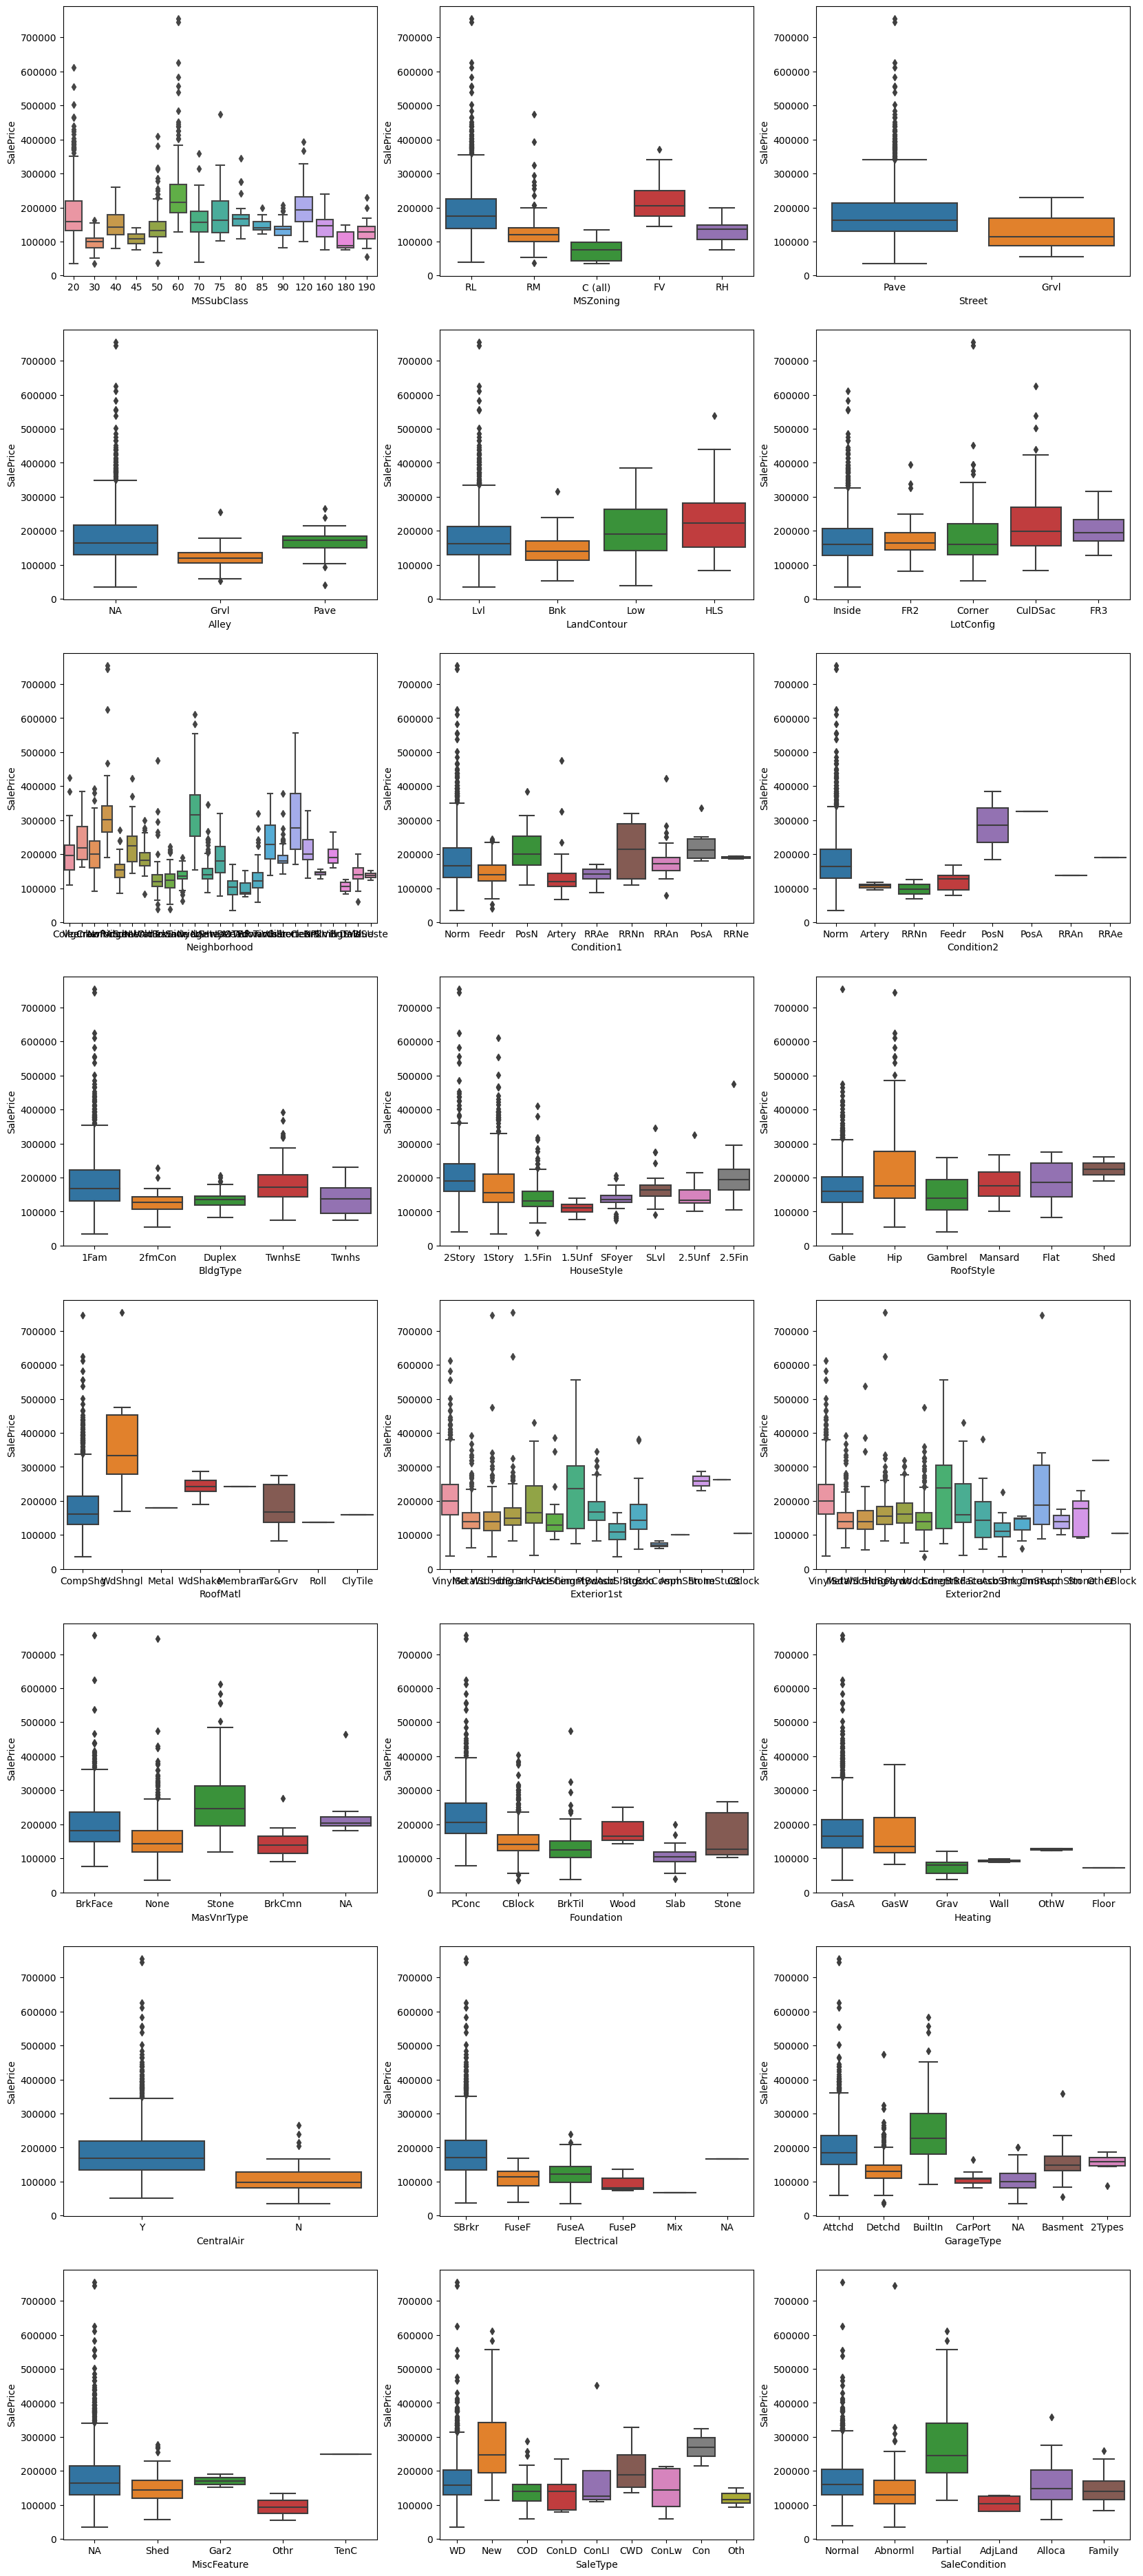

In [12]:
cat_col = [
    col for col in data_df.columns\
    if column_types_dict.get(col) in ['category']
]

plt.figure(figsize = (20,60))
for i, col in enumerate(cat_col):
    plt.subplot(10,3,i+1)
    sns.boxplot(
        data = data_df,
        x= data_df[col],
        y = data_df['SalePrice']
    )
plt.show()

# Modeling

In [13]:
X_columns = [col for col in data_processed.columns if col != 'SalePrice']
X_train = data_processed.loc[:, X_columns]
Y_train = data_processed.loc[:, 'SalePrice']

## LASSO

In [ ]:
lasso = Lasso(max_iter = 1000000)

parameters = {'alpha':[100,140,160,170]}

lasso_clf = GridSearchCV(
    estimator = lasso,
    param_grid = parameters,
    scoring = 'neg_root_mean_squared_error',
    cv = 10
).fit(X = X_train, y = Y_train)

In [ ]:
print(lasso_clf.best_params_)
print(lasso_clf.best_score_)

## Random Forest

In [ ]:
rf = RandomForestRegressor()

parameters = {
    'n_estimators': [100,150,200,250,300],
    #'max_depth': [10],
    #'min_samples_split' :[10],
    #'min_samples_leaf': [10,20],
}

rf_clf = GridSearchCV(
    estimator = rf,
    param_grid = parameters,
    scoring = 'neg_root_mean_squared_error',
    cv = 10
).fit(X = X_train, y = Y_train)

In [ ]:
print(rf_clf.best_params_)
print(rf_clf.best_score_)
print(rf_clf.cv_results_)

## XGBoost

In [65]:
xgb = xgb_r = xg.XGBRegressor()

parameters = {
    'n_estimators': [450,550],
    'eval_metric': ['rmse'],
    'reg_alpha': [0, 0.1,0.5],
    'reg_lambda': [0, 0.1,0.5],
    'objective': ['reg:squarederror'],
    'learning_rate':[0.1]
}

xgb_clf = GridSearchCV(
    estimator = xgb,
    param_grid = parameters,
    scoring = 'neg_root_mean_squared_error',
    cv = 10
).fit(X = X_train, y = Y_train)

In [66]:
print(xgb_clf.best_params_)
print(xgb_clf.best_score_)
print(xgb_clf.cv_results_)

{'eval_metric': 'rmse', 'learning_rate': 0.1, 'n_estimators': 450, 'objective': 'reg:squarederror', 'reg_alpha': 0.5, 'reg_lambda': 0}
-27550.190814782225
{'mean_fit_time': array([2.00687726, 1.81247125, 1.93241999, 1.93546278, 1.72906914,
       1.97396569, 1.88636963, 1.92472034, 1.91504192, 4.12094882,
       4.00217867, 4.27763948, 4.13986228, 4.01504314, 4.04261184,
       4.40777748, 4.04648516, 4.1121762 ]), 'std_fit_time': array([0.51615222, 0.04308531, 0.51514762, 0.49623701, 0.05935735,
       0.49808289, 0.04062357, 0.49832052, 0.47615097, 0.51415365,
       0.53572092, 0.63201602, 0.50336349, 0.53908978, 0.43241536,
       0.60955716, 0.50902255, 0.48450238]), 'mean_score_time': array([0.02588973, 0.02577574, 0.02524827, 0.02684705, 0.02543445,
       0.02563486, 0.0261322 , 0.02559214, 0.02534416, 0.02614393,
       0.02611549, 0.02624025, 0.02608974, 0.02597134, 0.02604558,
       0.02633479, 0.02666481, 0.02568815]), 'std_score_time': array([0.00080991, 0.00065651, 0.000

# Load test data

In [56]:
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv',
                      keep_default_na= False)
print(test_df.shape)
id_df = test_df['Id']
test_df = test_df.drop(columns = ['Id'])

(1459, 80)


In [57]:
test_df['SalePrice'] = 100.0

_ , test_df = create_binary_columns(
    column_types_dict,
    test_df,
    encoder = one_hot_encoder
)

_ , test_df = process_numeric_columns(
    column_types_dict,
    test_df,
    imputers = num_imputers
)

_, test_df = process_ordinal_columns(
    column_types_dict,
    test_df,
    ordinal_encoders = ordinal_encoders
)

test_df = test_df.drop(columns = ['SalePrice'])

test_df.to_csv('test_df_processed.csv')
test_df.isnull().sum().to_csv("count_na_test.csv")

display(test_df)

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,0.0,0.0,0.0,5,6,1961,1961,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,81.0,14267,1.0,0.0,0.0,6,6,1958,1958,108.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,74.0,13830,1.0,0.0,0.0,5,5,1997,1998,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,78.0,9978,1.0,0.0,0.0,6,6,1998,1998,20.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43.0,5005,1.0,0.0,0.0,8,5,1992,1992,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,0.0,0.0,0.0,4,7,1970,1970,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,21.0,1894,0.0,0.0,0.0,4,5,1970,1970,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,160.0,20000,0.0,0.0,0.0,5,7,1960,1996,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,62.0,10441,0.0,0.0,0.0,5,5,1992,1992,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
_, test_df = feature_engineering(column_types_dict, test_df)
#_, test_df = scaling(column_types_dict, test_df)

# Predict test data

In [59]:
prediction = xgb_clf.predict(test_df)
#prediction = num_scalers["SalePrice"].inverse_transform(prediction.reshape(-1,1))
print(prediction)

[127053.9  152074.36 187255.77 ... 159765.84 116539.44 209848.28]


In [60]:
prediction_df = pd.DataFrame(prediction)
prediction_df = prediction_df.rename(columns = {0: "SalePrice"})
prediction_df["Id"] = id_df
prediction_df = prediction_df[['Id', "SalePrice"]]
display(prediction_df)
prediction_df.to_csv('submission.csv', index = False)

,Id,SalePrice
0,1461,127053.898438
1,1462,152074.359375
2,1463,187255.765625
3,1464,200539.046875
4,1465,194011.828125
...,...,...
1454,2915,78004.656250
1455,2916,80539.679688
1456,2917,159765.843750
1457,2918,116539.437500
